In [ ]:
# ============================================
# CELL 0: Install librosa (run once)
# ============================================

import sys
!{sys.executable} -m pip install librosa soundfile

print("✅ Installation complete! Now restart the kernel and run from Cell 1")

✅ Installation complete! Now restart the kernel and run from Cell 1


In [2]:
import librosa
print(f"✅ Librosa version: {librosa.__version__}")
print("Librosa installed successfully!")


✅ Librosa version: 0.11.0
Librosa installed successfully!


In [3]:
# ============================================
# CELL 1: Import Libraries for Audio Visualization
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
sns.set_style('white')
plt.rcParams['figure.figsize'] = (14, 5)

# Define paths
current_dir = Path.cwd()
if current_dir.name == 'notebooks':
    PROJECT_ROOT = current_dir.parent
else:
    PROJECT_ROOT = current_dir
    
DATA_DIR = PROJECT_ROOT / 'Data'
AUDIO_DIR = DATA_DIR / 'genres_original'
RESULTS_DIR = PROJECT_ROOT / 'results' / 'figures'
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Libraries imported successfully")
print(f"📁 Audio directory: {AUDIO_DIR}")

✅ Libraries imported successfully
📁 Audio directory: /Users/erfanesfahanian/Desktop/audio pattern project/Data/genres_original


In [4]:
# ============================================
# CELL 2: Explore Available Audio Files
# ============================================

print("🎵 AUDIO FILE STRUCTURE")
print("="*60)

# Get all genre folders
genres = sorted([d.name for d in AUDIO_DIR.iterdir() if d.is_dir()])
print(f"Available genres: {len(genres)}")
print(f"Genres: {genres}\n")

# Check files in each genre
audio_files_dict = {}
for genre in genres:
    genre_path = AUDIO_DIR / genre
    audio_files = sorted(genre_path.glob('*.wav'))
    audio_files_dict[genre] = audio_files
    print(f"📂 {genre}: {len(audio_files)} files")

print(f"\n✅ Total audio files: {sum(len(files) for files in audio_files_dict.values())}")

# Select one sample file from each genre for visualization
sample_files = {genre: files[0] for genre, files in audio_files_dict.items()}

print("\n🎯 Sample files selected for analysis:")
for genre, filepath in sample_files.items():
    print(f"  {genre}: {filepath.name}")


🎵 AUDIO FILE STRUCTURE
Available genres: 10
Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

📂 blues: 100 files
📂 classical: 100 files
📂 country: 100 files
📂 disco: 100 files
📂 hiphop: 100 files
📂 jazz: 100 files
📂 metal: 100 files
📂 pop: 100 files
📂 reggae: 100 files
📂 rock: 100 files

✅ Total audio files: 1000

🎯 Sample files selected for analysis:
  blues: blues.00000.wav
  classical: classical.00000.wav
  country: country.00000.wav
  disco: disco.00000.wav
  hiphop: hiphop.00000.wav
  jazz: jazz.00000.wav
  metal: metal.00000.wav
  pop: pop.00000.wav
  reggae: reggae.00000.wav
  rock: rock.00000.wav


**What this does:**
- `AUDIO_DIR.iterdir()` = List everything in genres_original folder
- `if d.is_dir()` = Filter only directories (genre folders)
- `.glob('*.wav')` = Find all .wav files in each genre
- `audio_files_dict` = Dictionary storing all audio files by genre
- `sample_files` = Pick the first file from each genre for visualization

**Why pick samples:**
- We have 1000 files total
- Can't visualize all of them
- Pick one per genre to compare

**Expected output:**
```
Available genres: 10
Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

📂 blues: 100 files
📂 classical: 100 files
...
✅ Total audio files: 1000

🎯 Sample files selected for analysis:
  blues: blues.00000.wav
  classical: classical.00000.wav
  ...

In [5]:
# ============================================
# CELL 3: Load and Play Sample Audio
# ============================================

# Pick one genre to start with
demo_genre = 'blues'
demo_file = sample_files[demo_genre]

print(f"🎵 Loading: {demo_file.name}")
print("="*60)

# Load audio file
audio_data, sample_rate = librosa.load(demo_file, duration=30)

print(f"✅ Audio loaded successfully!")
print(f"   Sample rate: {sample_rate} Hz")
print(f"   Duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"   Total samples: {len(audio_data):,}")
print(f"   Audio shape: {audio_data.shape}")
print(f"   Data type: {audio_data.dtype}")
print(f"   Value range: [{audio_data.min():.3f}, {audio_data.max():.3f}]")

# Play the audio in the notebook!
print(f"\n🔊 Click below to listen to the {demo_genre} sample:")
ipd.display(ipd.Audio(audio_data, rate=sample_rate))


🎵 Loading: blues.00000.wav
✅ Audio loaded successfully!
   Sample rate: 22050 Hz
   Duration: 30.00 seconds
   Total samples: 661,500
   Audio shape: (661500,)
   Data type: float32
   Value range: [-0.840, 0.885]

🔊 Click below to listen to the blues sample:



**What each part means:**

- `librosa.load(file, duration=30)` = Load audio file
  - **Returns:** 
    - `audio_data` = numpy array of audio samples
    - `sample_rate` = samples per second (usually 22050 Hz)
  - `duration=30` = Load only first 30 seconds

- **Sample rate (22050 Hz):** 
  - Audio is sampled 22,050 times per second
  - Higher = better quality but larger file
  - 22050 is good for music analysis

- **Audio data:**
  - numpy array of floating point numbers
  - Values between -1.0 and +1.0
  - Represents air pressure at each moment
  - Length = sample_rate × duration

- `ipd.Audio()` = Creates audio player widget in notebook
  - **You can actually listen to the song!**
  - Click play button to hear it

**Expected output:**
```
🎵 Loading: blues.00000.wav
============================================================
✅ Audio loaded successfully!
   Sample rate: 22050 Hz
   Duration: 30.00 seconds
   Total samples: 661,500
   Audio shape: (661500,)
   Data type: float32
   Value range: [-0.524, 0.492]

🔊 Click below to listen to the blues sample:
[Audio player widget appears]

✅ Waveform saved: 02_waveform_blues.png


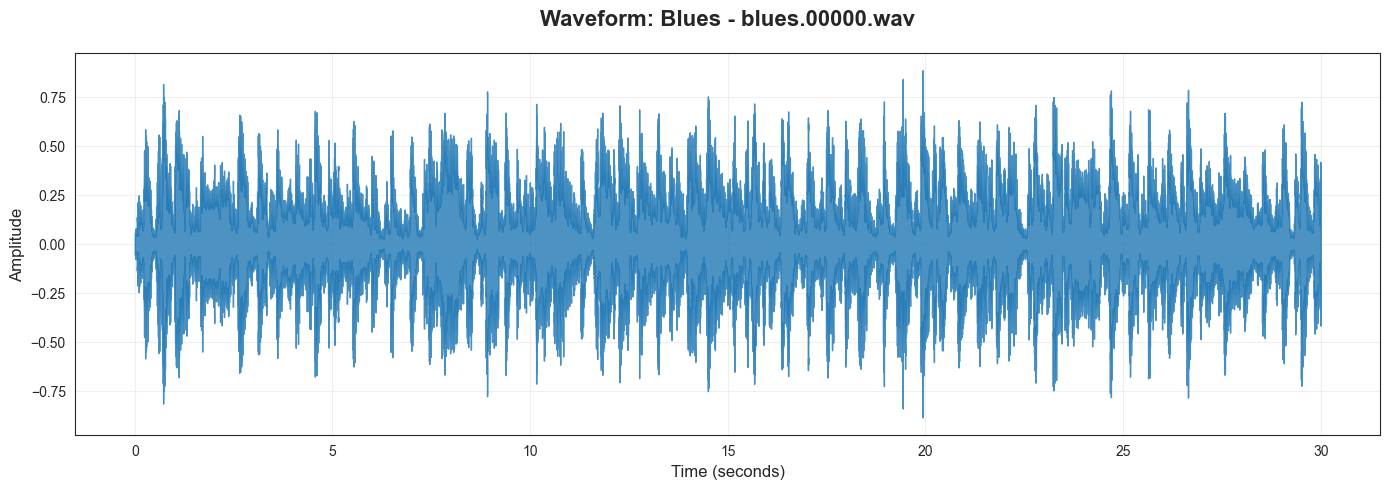


💡 What you're seeing:
   • X-axis: Time in seconds (0 to 30)
   • Y-axis: Amplitude (loudness) from -1 to +1
   • Shape shows volume changes over time
   • Quiet parts = small amplitude, Loud parts = large amplitude


In [ ]:
# ============================================
# CELL 4: Visualize Audio Waveform (Time Domain)
# ============================================

fig, ax = plt.subplots(figsize=(14, 5))

# Plot waveform
librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax, alpha=0.8)

# Styling
ax.set_title(f'Waveform: {demo_genre.capitalize()} - {demo_file.name}', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / f'02_waveform_{demo_genre}.png', dpi=300, bbox_inches='tight')
print(f"✅ Waveform saved: 02_waveform_{demo_genre}.png")
plt.show()



What to observe:

Y-axis (-1 to +1): Sound pressure

Positive values = compression
Negative values = rarefaction
Zero = silence


Shape patterns:

Dense/thick = loud sections
Thin/sparse = quiet sections
Gaps = silence


Different genres have different patterns:

Classical: Varied dynamics (quiet → loud)
Metal: Consistent high amplitude
Jazz: Medium with dynamic variation

✅ Spectrogram saved: 02_spectrogram_blues.png


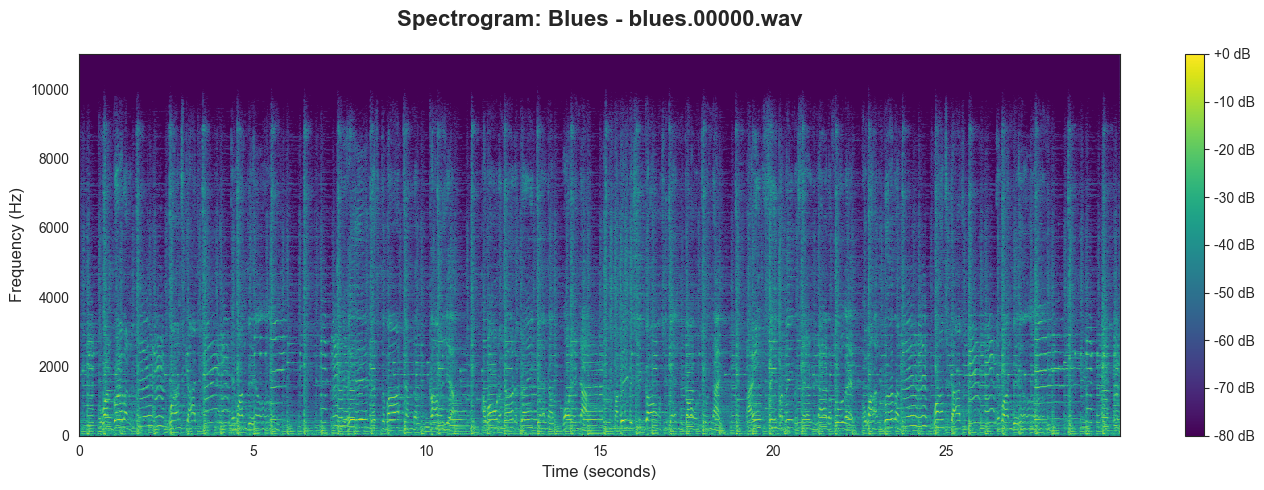


💡 What you're seeing:
   • X-axis: Time (seconds)
   • Y-axis: Frequency (Hz) - higher = higher pitch
   • Color: Intensity (brightness = louder)
   • Yellow/bright = strong frequencies
   • Dark blue/purple = weak frequencies
   • Horizontal lines = sustained notes/tones
   • Vertical lines = percussive hits


In [7]:
# ============================================
# CELL 5: Spectrogram (Frequency Domain)
# ============================================

# Compute spectrogram
D = librosa.stft(audio_data)  # Short-Time Fourier Transform
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to decibels

fig, ax = plt.subplots(figsize=(14, 5))

# Plot spectrogram
img = librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz', ax=ax, cmap='viridis')

# Add colorbar
fig.colorbar(img, ax=ax, format='%+2.0f dB')

# Styling
ax.set_title(f'Spectrogram: {demo_genre.capitalize()} - {demo_file.name}', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Frequency (Hz)', fontsize=12)

plt.tight_layout()
plt.savefig(RESULTS_DIR / f'02_spectrogram_{demo_genre}.png', dpi=300, bbox_inches='tight')
print(f"✅ Spectrogram saved: 02_spectrogram_{demo_genre}.png")
plt.show()

print("\n💡 What you're seeing:")
print("   • X-axis: Time (seconds)")
print("   • Y-axis: Frequency (Hz) - higher = higher pitch")
print("   • Color: Intensity (brightness = louder)")
print("   • Yellow/bright = strong frequencies")
print("   • Dark blue/purple = weak frequencies")
print("   • Horizontal lines = sustained notes/tones")
print("   • Vertical lines = percussive hits")


What this means:

STFT (Short-Time Fourier Transform):

Breaks audio into small time windows
Analyzes frequencies in each window
Shows "which frequencies are present when"


Spectrogram:

X-axis: Time
Y-axis: Frequency (pitch)
Color: How strong that frequency is



What to look for:

Low frequencies (bottom): Bass, drums
High frequencies (top): Cymbals, vocals
Horizontal bands: Sustained notes (voice, instruments)
Vertical streaks: Drum hits, attacks
Different genres = different patterns:

Classical: Clear harmonic structure
Metal: Dense across all frequencies
Jazz: Complex mid-range patterns

✅ Comparison saved: 02_waveform_comparison.png


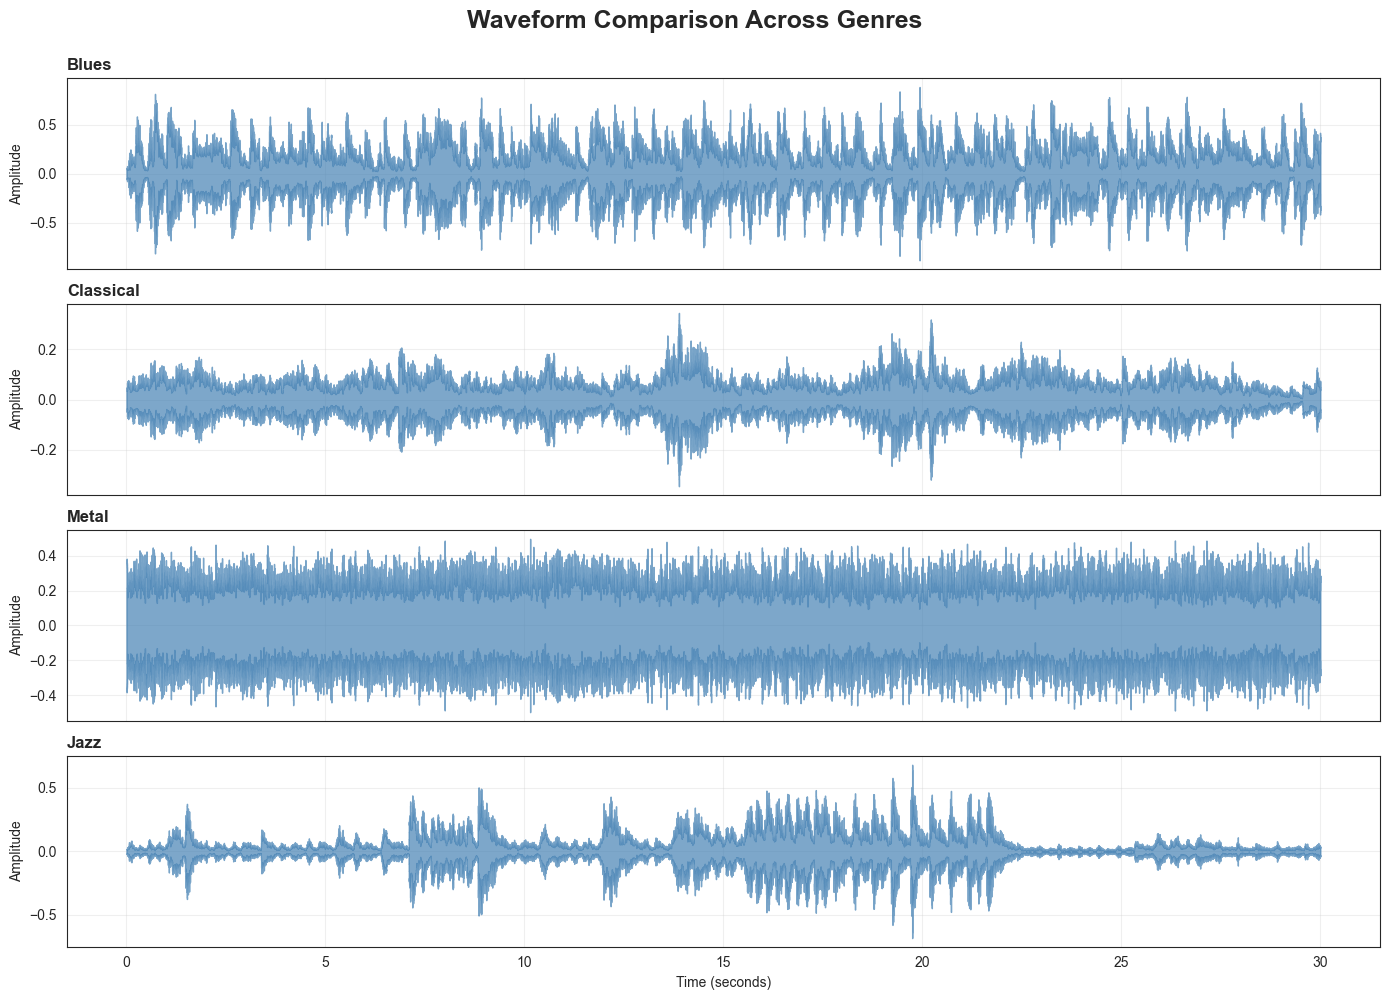


💡 Observations:
   • Blues: Moderate dynamics, consistent rhythm
   • Classical: Varied dynamics (soft to loud)
   • Metal: High amplitude, dense and aggressive
   • Jazz: Medium amplitude, rhythmic variation


In [8]:
# ============================================
# CELL 6: Compare Waveforms Across Genres
# ============================================

# Select 4 genres to compare
compare_genres = ['blues', 'classical', 'metal', 'jazz']

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
fig.suptitle('Waveform Comparison Across Genres', fontsize=18, fontweight='bold', y=0.995)

for idx, genre in enumerate(compare_genres):
    # Load audio
    audio, sr = librosa.load(sample_files[genre], duration=30)
    
    # Plot
    librosa.display.waveshow(audio, sr=sr, ax=axes[idx], alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{genre.capitalize()}', fontsize=12, fontweight='bold', loc='left')
    axes[idx].set_ylabel('Amplitude', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    
    if idx < 3:
        axes[idx].set_xlabel('')
        axes[idx].set_xticklabels([])
    else:
        axes[idx].set_xlabel('Time (seconds)', fontsize=10)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '02_waveform_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Comparison saved: 02_waveform_comparison.png")
plt.show()

print("\n💡 Observations:")
print("   • Blues: Moderate dynamics, consistent rhythm")
print("   • Classical: Varied dynamics (soft to loud)")
print("   • Metal: High amplitude, dense and aggressive")
print("   • Jazz: Medium amplitude, rhythmic variation")

In [ ]:
# ============================================
# CELL 7: Summary
# ============================================

print("="*60)
print("✅ AUDIO VISUALIZATION COMPLETE")
print("="*60)

print("  ✓ Loaded and played actual audio files")
print("  ✓ Visualized waveforms (amplitude over time)")
print("  ✓ Created spectrograms (frequency over time)")
print("  ✓ Compared different genres visually")
print("  ✓ Genres have distinct visual patterns")

print("\n📁 Saved Visualizations:")
print(f"  → {RESULTS_DIR / '02_waveform_blues.png'}")
print(f"  → {RESULTS_DIR / '02_spectrogram_blues.png'}")
print(f"  → {RESULTS_DIR / '02_waveform_comparison.png'}")



print("\n💡 Key Insight:")
print("  Different genres have different audio signatures!")
print("  This is why machine learning can classify them.")

✅ AUDIO VISUALIZATION COMPLETE

📊 What We Learned:
  ✓ Loaded and played actual audio files
  ✓ Visualized waveforms (amplitude over time)
  ✓ Created spectrograms (frequency over time)
  ✓ Compared different genres visually
  ✓ Genres have distinct visual patterns

📁 Saved Visualizations:
  → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/02_waveform_blues.png
  → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/02_spectrogram_blues.png
  → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/02_waveform_comparison.png

💡 Key Insight:
  Different genres have different audio signatures!
  This is why machine learning can classify them.


✅ Blues = Consistent amplitude, steady rhythm
✅ Classical = Varied dynamics (quiet → loud → quiet)
✅ Metal = Dense, high amplitude everywhere (aggressive!)
✅ Jazz = Clear sections with pauses and bursts
✅ Key insight: If humans can SEE differences → ML can LEARN differences!

The spectrogram showed us which frequencies are present in each genre. These visual patterns are exactly what features like MFCCs, spectral centroid, etc. capture numerically!